# py4DSTEM tutorial 1: Introduction

This tutorial introduces py4DSTEM, an python-based analysis package for 4D-STEM data, and demonstrates how to create a strain map from a 4D-STEM datacube.

This notebook includes with
- Interacting with DataCubes: how to load, slice, and display 4D data
- Filehandling: how to save and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM

### Datacubes

In [ ]:
# Load a datacube

fp = "/home/ben/Data/20180905_FePO4_unlithiated/h5/Sample_LFP_datacube.h5"
dc = py4DSTEM.file.io.read(fp)

The `dc` variable we've just defined is a py4DSTEM `DataCube` object.

##### Exercises:

- where does its data live?
- what is the shape of the data?

In [37]:
dc

The code below creates a figure with two plots...

##### Exercises:
- add to the plot on the left a single diffraction pattern from scan position $(x,y) = (30,36)$
- add to the plot on the right an image of the sample
- add to the plot on the right a marker showing scan position $(30,36)$

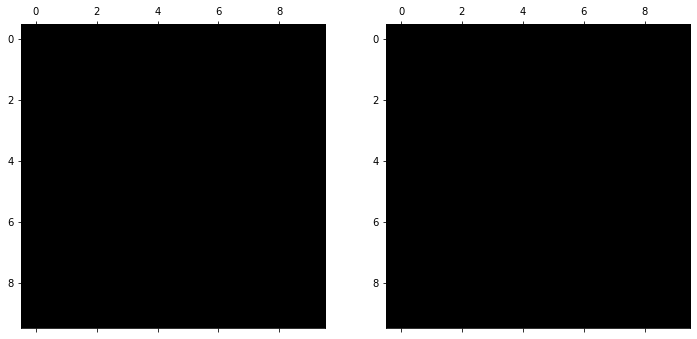

In [41]:
# Show

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.matshow(  np.ones((10,10))  )
ax2.matshow(  np.ones((10,10))  )
plt.show()

### Filehandling - saving and loading

For reading a writing files, py4DSTEM bundles python arrays into the following objects:
- DataCube
- RealSlice
- DiffractionSlice
- PointList
- PointListArray

Below we'll look at how to use these objects to save parts of our analysis, and then load them again later.

In [48]:
# Let's say we want to save the virtual image we created in a new file.
# The syntax is:

image = np.average(dc.data, axis=(2,3))
image_real_slice = py4DSTEM.file.datastructure.RealSlice(data=image, name='my_virtual_image')

savepath = "/home/ben/Desktop/sample_processing_file.h5"
py4DSTEM.file.io.save(image_real_slice, savepath)

Creating file /home/ben/Desktop/sample_processing_file.h5...
Done.


In [49]:
# Now let's say we want to add to this file several diffraction patterns at various scan positions.

dp_data = np.zeros((dc.Q_Nx,dc.Q_Ny,3))
dp_data[:,:,0] = dc.data[0,0,:,:]
dp_data[:,:,1] = dc.data[10,20,:,:]
dp_data[:,:,2] = dc.data[30,36,:,:]

dp_diffraction_slice = py4DSTEM.file.datastructure.DiffractionSlice(data=dp_data,
                                                                    name = 'diffraction_patterns',
                                                                    slicelabels=['dp1','dp2','dp3'])

py4DSTEM.file.io.append(dp_diffraction_slice, savepath)  # Note the change from 'save' to 'append'!

Opening file /home/ben/Desktop/sample_processing_file.h5...
Done.


In [50]:
# Let's remove these objects from memory and then reload them to make sure everything worked...

del image_real_slice, dp_diffraction_slice

In [51]:
# We can look at what's in a file before loading with a Filebrowser

browser = py4DSTEM.file.io.FileBrowser(savepath)
browser.show_dataobjects()

 Index                  Name                        Type        
   0    diffraction_patterns                DiffractionSlice    
   1    my_virtual_image                    RealSlice           


In [52]:
# Now we can load these by name:

image_real_slice = browser.get_dataobject('my_virtual_image')

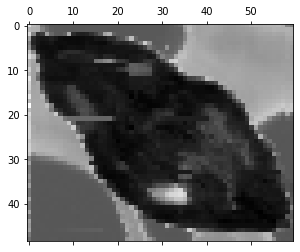

In [54]:
# Finally, we'll plot the image to make sure everything worked as expected:

fig,ax = plt.subplots()
ax.matshow(image_real_slice.data)
plt.show()